[0.09245841 0.25580033 0.08191912 0.08988139 0.12767816 0.13254218
 0.09236395 0.12735646]


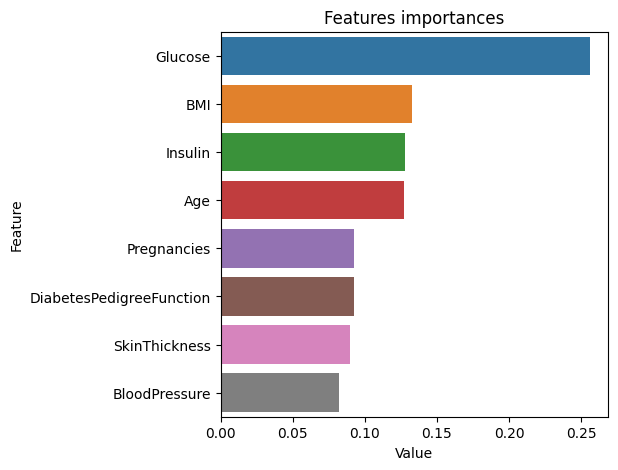

In [28]:
#checking feature importances
from sklearn.ensemble import ExtraTreesRegressor 
x=df2.drop("Outcome", axis=1)
y = df2.Outcome
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
#visualizing by bar graph
feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': x.columns})
plt.figure(figsize=(5, 5))
sns.barplot(x="Value",y="Feature", data=feature_imp.sort_values(by="Value",ascending=False))
plt.title('Features importances')
plt.show()

In [29]:
#applying pca 
#scaling is required before applying pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
scaled_data=pd.DataFrame(scaled_data)
scaled_data
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4'])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.32522962 0.18029869 0.14600216 0.11959445]


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
#evaluating the model for different values of parameters
model_params={
 "decision_tree":{
 'model':DecisionTreeClassifier(random_state=0),
 'params':{
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth':[3,4,5,6],
 'criterion':['gini', 'entropy', 'log_loss']
 }
 },
 "random_forest":{
 'model': RandomForestClassifier(),
 'params':{
 'n_estimators': [10,50,100], 
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth':[3,4,5,6],
 'criterion':['gini', 'entropy', 'log_loss']
 
 
 }
 }
}

In [33]:
scores_scaled = []
for mn,mp in model_params.items():
 clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
 clf.fit(x_train,y_train)
 scores_scaled.append({
 'model' : mn,
 'best score': clf.best_score_,
 "best params": clf.best_params_
 })
 
df3 = pd.DataFrame(scores_scaled, columns=["model","best score",'best params'])
df3.sort_values(by=['best score'], ascending=False)
pd.set_option('display.max_colwidth', None)

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.wa

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.wa

/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default v

/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default v

/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default v

/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default v

/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default v

/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default v

In [34]:
# Splitting the dataset into the Training set and Test set for scaled data
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(scaled_data, y, test_size=0.2, random_state=0)

In [35]:
#evaluating svm,logistic regression and gradient boosting for scaled data
model_params2={
 "svm":{
 'model': SVC(random_state=0),
 'params':{
 'C': [0.1, 1, 10, 100, 1000], 
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['rbf','linear']
 }
 },
 'logistic_regression':{
 'model': LogisticRegression(),
 'params':{'penalty':['l1', 'l2', 'elasticnet', None], 
 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'C': [1,5,10]
 }
 },
"gradient_boosting":{
 'model': GradientBoostingClassifier(),
 'params':{
 'max_depth':[3,4,5],
 'n_estimators':[5,10,50,100],
 'criterion':['friedman_mse', 'squared_error', 'mse']
 }
 
 }
}

In [36]:
scores_scaled2 = []
for mn,mp in model_params2.items():
 clf2 = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
 clf2.fit(x_train1,y_train1)
 scores_scaled2.append({
 'model' : mn,
 'best score': clf2.best_score_,
 "best params": clf2.best_params_
 })
 
df4 = pd.DataFrame(scores_scaled2, columns=["model","best score",'best params'])
df4.sort_values(by=['best score'], ascending=False)

/home/crossml/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
195 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/crossml/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/crossml/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/crossml/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise Val

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tre

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/crossml/env/lib/python3.8/site-packages/sklearn/tr

,model,best score,best params
1,logistic_regression,0.762242,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}"
0,svm,0.757337,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}"
2,gradient_boosting,0.744289,"{'criterion': 'friedman_mse', 'max_depth': 3, 'n_estimators': 100}"


In [37]:
#since logistic regression gave best accuracy, so applying that
model_final = LogisticRegression(penalty='l1',solver='saga',C=1)
model_final.fit(x_train1, y_train1)
y_pred1 = model_final.predict(x_test1)
print('Accuracy of model for testing data is ',accuracy_score(y_test1,y_pred1))


Accuracy of model for testing data is  0.7922077922077922


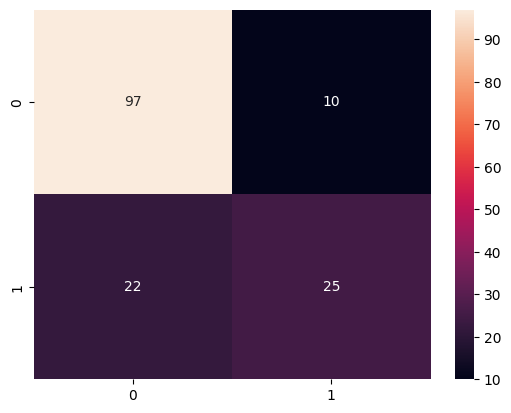

In [38]:
#heatmap for confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test1,y_pred1)),annot=True)
plt.show()

In [39]:
#checking for avg accuracy of the model
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_final, scaled_data, y, cv=10)
accuracy_rate = []
accuracy_rate.append(score.mean())
print('Average accuracy of the final model is ',accuracy_rate)


Average accuracy of the final model is  [0.7656356801093643]
